# Bernoulli Thompson Sampling Experiment

### Import Modules

In [1]:
from thompson_sampling.bernoulli import BernoulliExperiment
from thompson_sampling.priors import BetaPrior
from pandas import Series

### Create Priors and Instantiate Experiment with Priors

In [2]:
means = Series([0.5, 0.7, 0.6])
variances = Series([0.1, 0.15, 0.23])
effective_sizes = Series([3, 20, 10])
labels = Series(["drug1", "drug2", "drug3"])

In [3]:
pr = BetaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'drug1': {'a': 2.0, 'b': 2.0},
 'drug2': {'a': 14.0, 'b': 6.0},
 'drug3': {'a': 6.0, 'b': 4.0}}

In [4]:
experiment = BernoulliExperiment(priors = pr)

### Choose arms for the next experiment

In [5]:
experiment.choose_arm()

'drug2'

In [6]:
experiment.choose_arm()

'drug3'

### Simulate posterior predictive distributions for all labels

In [7]:
experiment.get_ppd(size = 5000) # size is the number of values to simulate for the distributions

[{'Label': 'drug1',
  'Percentage - Success': 0.5002,
  'Percentage - Fail': 0.4998},
 {'Label': 'drug2',
  'Percentage - Success': 0.7024,
  'Percentage - Fail': 0.2976},
 {'Label': 'drug3',
  'Percentage - Success': 0.5976,
  'Percentage - Fail': 0.4024}]

We can see that "drug 2" has the highest simulated probability of success

### Update the options by providing the rewards


In [8]:
rewards = [{"label":"drug1", "reward":1},{"label":"drug2", "reward":0},{"label":"drug2", "reward":0}]
experiment.add_rewards(rewards)

In [9]:
experiment.get_ppd(size=5000)

[{'Label': 'drug1',
  'Percentage - Success': 0.6078,
  'Percentage - Fail': 0.3922},
 {'Label': 'drug2', 'Percentage - Success': 0.639, 'Percentage - Fail': 0.361},
 {'Label': 'drug3',
  'Percentage - Success': 0.5944,
  'Percentage - Fail': 0.4056}]

We can see that the percentages for "drug1" and "drug2" have changed with the added information

### View distribution of the posteriors

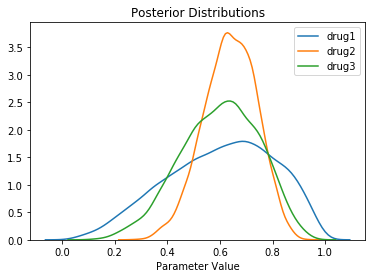

In [12]:
experiment.plot_posterior()